In [1]:
from collections import defaultdict
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle
from LUPI_evo import *

In [2]:
#Some code that implements progress bars for long computations
#https://www.mikulskibartosz.name/how-to-display-a-progress-bar-in-jupyter-notebook/
bar_length = 20
def update_progress(progress):
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
#Plotting function to pass to the animation function
# Animates single histogram
def update_hist(frame, data):

    #Extract info from data variable
    bins, counts, ne = data

    #Clear the current plot
    plt.cla()

    #Set the axis ranges
    plt.ylim(0, 1.1)
    plt.gca().set_xticks(bins)

    #Plot the histogram
    plt.bar(bins, counts[frame], width=1) #width is the width of the bars

    #Plot NE solution
    plt.plot(bins, ne[1:], 'rD', label="NE")

    #Add titles, labels, etc.
    plt.title("Average Player Strategy (Unweighted)")
    plt.annotate("N = {}".format(len(ne)-1), xy=(0.75, 0.95), xycoords='axes fraction', fontsize=12)
    plt.annotate("Gen = {}".format(frame), xy=(0.75,0.9), xycoords='axes fraction', fontsize=12)


#Plotting function to pass to the animation function
# Plots histogram, mean, and std deviation
def update_hist_mean_std(frame, data):

    #Extract info from data variable
    p1s, means, std_devs, ne = data
    xs = list(range(1, len(p1s)+1))

    #Clear the current plot
    plt.cla()
    plt.clf()

    #Plot the histogram
    plt.subplot(121)
    plt.hist(p1s[frame], bins=20, density=True, range=(0,1))
    plt.title("p_1 Distribution")
    plt.xlabel("p_1")
    plt.ylabel("Frequency")
    plt.annotate("N = {}".format(len(ne)-1), xy=(0.75, 0.96), xycoords='axes fraction', fontsize=8)
    plt.annotate("Gen = {:03d}".format(frame), xy=(0.75,0.91), xycoords='axes fraction', fontsize=8)
    
    
    #Plot the graph of averages
    plt.subplot(222)
    plt.xlim((1,len(means)))
    plt.ylim((0, 1))
    plt.plot(xs[:frame], means[:frame])
    plt.plot([xs[0], xs[-1]], [ne[1], ne[1]], 'r-')
    plt.title("Mean/Std_Dev (top/botom)")
    
    #Plot standard deviations
    plt.subplot(224)
    plt.xlim((1,len(std_devs)))
    plt.ylim((min(std_devs), max(std_devs)))
    plt.plot(xs[:frame], std_devs[:frame])
    plt.xlabel("Gen")

    plt.tight_layout()

In [4]:
#Generate Data
with open("data/random_sim_data.pk", 'rb') as file:
    random_data = pickle.load(file)

with open("data/uniform_sim_data.pk", 'rb') as file:
    uniform_data = pickle.load(file)

with open("data/NE_3-11.pk", 'rb') as file:
    NE_data = pickle.load(file)

In [5]:
# #Get ready for Plotting
# for N in range(3, 11):
#     udata = uniform_data[N]
#     rdata = random_data[N]
#     u_avg_dists = []
#     r_avg_dists = []
#     for rplayers in rdata:
#         strats = np.array([np.array(p.strat) for p in rplayers])
#         scores = np.array([p.score for p in rplayers])
#         avg = np.average(strats, 0)#, weights=(scores if not np.all(scores == 0) else None))
#         r_avg_dists.append(avg)
#     for uplayers in udata:
#         strats = np.array([np.array(p.strat) for p in uplayers])
#         scores = np.array([p.score for p in uplayers])
#         avg = np.average(strats, 0)#, weights=(scores if not np.all(scores == 0) else None))
#         u_avg_dists.append(avg)

#     bins = list(range(1, N+1))
#     r_anim_data = (bins, r_avg_dists, NE_data[N])
#     u_anim_data = (bins, u_avg_dists, NE_data[N])
#     r_frames = len(r_avg_dists)
#     u_frames = len(u_avg_dists)

#     #Animate
#     fig = plt.figure()
#     video = animation.FuncAnimation(fig, update_hist, r_frames, fargs=(r_anim_data,))
#     video.save("plots/mean_dist_N{}_rand_unweighted.mp4".format(N), fps=r_frames/30)
#     video = animation.FuncAnimation(fig, update_hist, u_frames, fargs=(u_anim_data,))
#     video.save("plots/mean_dist_N{}_unif_unweighted.mp4".format(N), fps=u_frames/30)

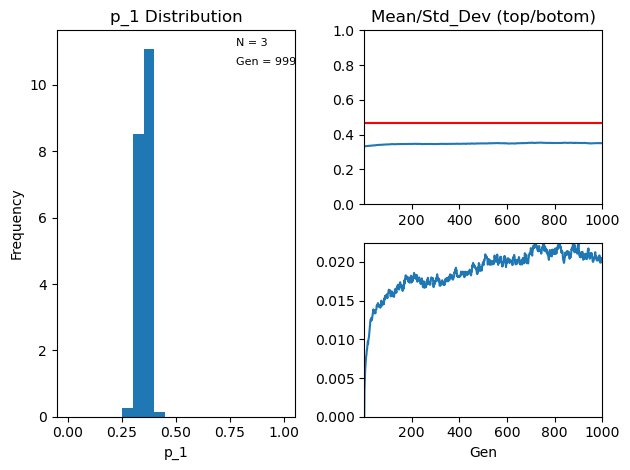

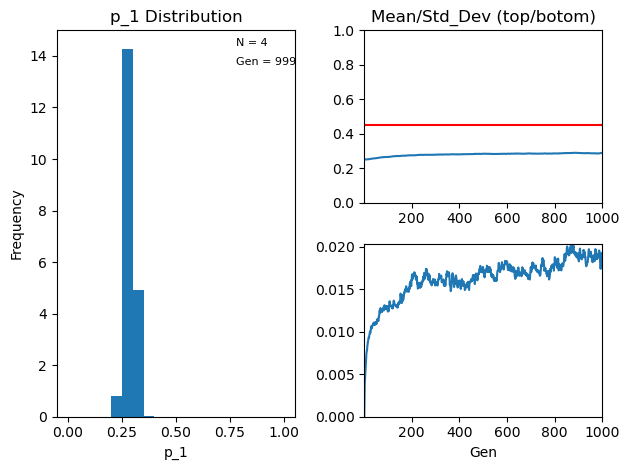

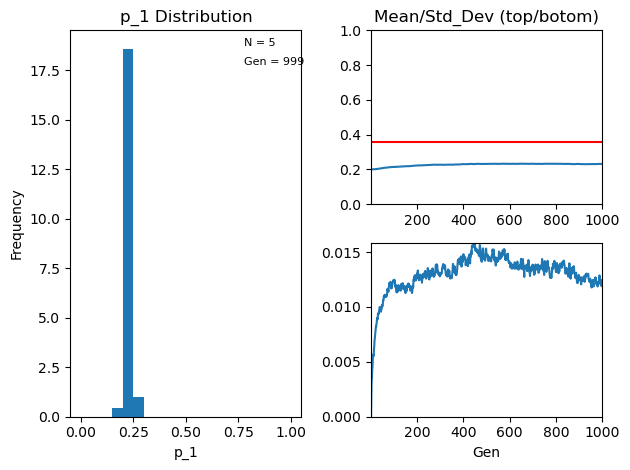

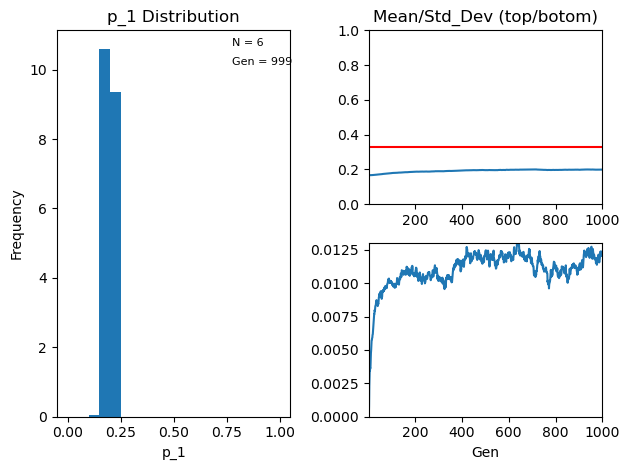

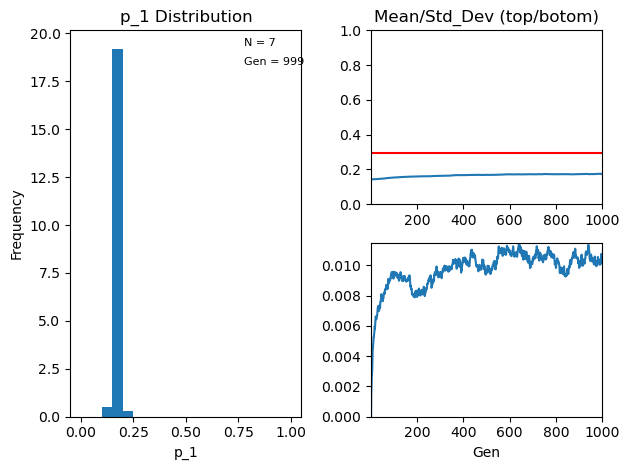

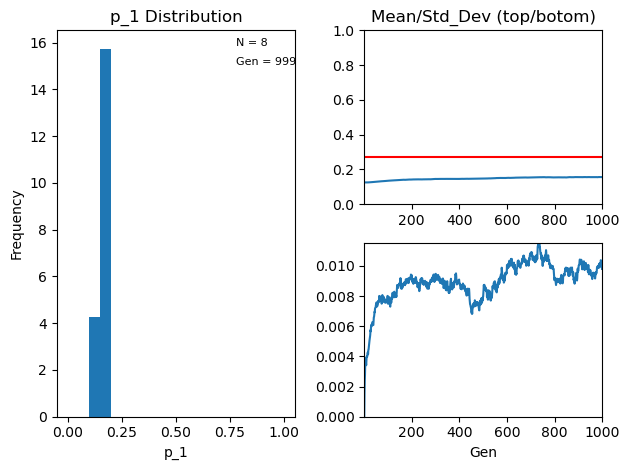

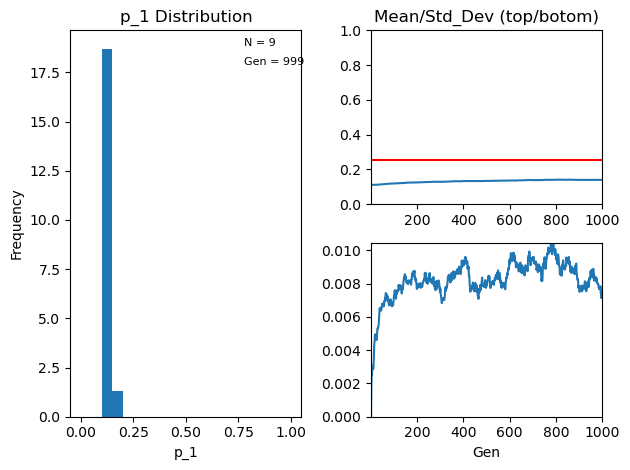

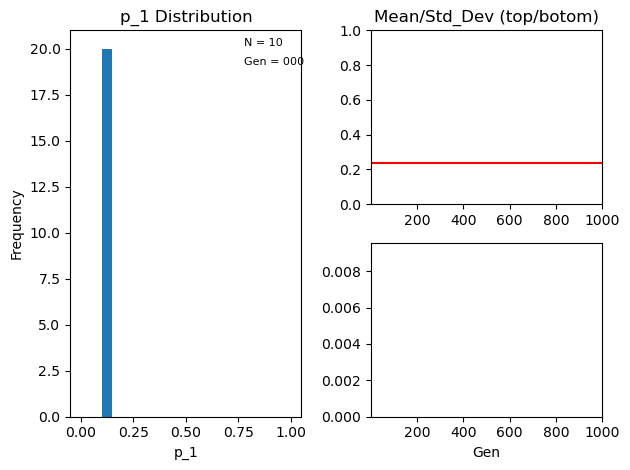

In [6]:
#Get ready for Plotting
for N in range(3, 11):
    udata = uniform_data[N]
    rdata = random_data[N]
    r_p1s = []
    u_p1s = []
    for rplayers in rdata:
        strats = np.array([np.array(p.strat) for p in rplayers])
        r_p1s.append([strat[0] for strat in strats])
    for uplayers in udata:
        strats = np.array([np.array(p.strat) for p in uplayers])
        u_p1s.append([strat[0] for strat in strats])

    r_p1_means = [np.mean(x) for x in r_p1s]
    r_p1_stds = [np.std(x) for x in r_p1s]
    u_p1_means = [np.mean(x) for x in u_p1s]
    u_p1_stds = [np.std(x) for x in u_p1s]
    r_anim_data = (r_p1s, r_p1_means, r_p1_stds, NE_data[N])
    u_anim_data = (u_p1s, u_p1_means, u_p1_stds, NE_data[N])
    r_frames = len(r_p1_means)
    u_frames = len(u_p1_means)

    #Animate
    fig = plt.figure()
    video = animation.FuncAnimation(fig, update_hist_mean_std, r_frames, fargs=(r_anim_data,))
    video.save("plots/p1_N{}_rand.mp4".format(N), fps=r_frames/30)
    video = animation.FuncAnimation(fig, update_hist_mean_std, u_frames, fargs=(u_anim_data,))
    video.save("plots/p1_N{}_unif.mp4".format(N), fps=u_frames/30)

In [7]:
# #Animate
# fig = plt.figure()
# video = animation.FuncAnimation(fig, update_hist, len(avg_dists), fargs=(data,))

# #Save the animation
# #Careful, running this code twice without changing the filename will overwrite the previous file!
# video.save("animation.mp4")

In [8]:
# #Animate
# fig = plt.figure()
# video = animation.FuncAnimation(fig, update_hist_mean_std, len(avg_dists), fargs=(data2,))

# #Save the animation
# #Careful, running this code twice without changing the filename will overwrite the previous file!
# video.save("animation2.mp4")